# 1.4.13 Hough Line Transform

# Hough Tranform in OpenCV  검출 

In [29]:
import cv2
import numpy as np
# 허프 변환  스레솔드 숫자각 작으면 많은선 검출 되지만 정확도 떨어지고  크면 정확도올라감
img = cv2.imread('a4.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,150,200,apertureSize = 3)  ## 엣지 검출
lines = cv2.HoughLines(edges,1,np.pi/90,50)## 마지막값 스레솔드
for i in range(40):# 검출할 선 수
    for rho,theta in lines[i]:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))
        cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)
#cv2.imwrite('houghlines3.jpg',img)
cv2.imshow('res_png',img)
cv2.waitKey(0)
cv2.destroyAllWindows()


# Probabilistic Hough Transform 활률값 검출

In [15]:
import cv2
import numpy as np
img = cv2.imread('a4.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)## 확률값으로 값조절
edges = cv2.Canny(gray,50,150,apertureSize = 3)
minLineLength = 100
maxLineGap = 10
lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength,maxLineGap)
for x1,y1,x2,y2 in lines[0]:
    cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)
cv2.imshow('res_png',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [5]:
def nothing(x):
    pass

In [6]:
cv2.namedWindow('image')
cv2.createTrackbar('threshold', 'image', 100, 500, nothing)
cv2.createTrackbar('number', 'image', 1, 100, nothing)
while(1):
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
    threshold = cv2.getTrackbarPos('threshold', 'image')
    number = cv2.getTrackbarPos('number', 'image')
    lines = cv2.HoughLines(edges, 1, np.pi/180, threshold)
    img_rgb = cv2.imread('a4.jpg')
    numbers = number
    if(lines.shape[0]<number):
        numbers = lines.shape[0]
    for i in range(numbers):
        for rho,theta in lines[i]:
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a*rho
            y0 = b*rho
            x1 = int(x0 + 1000*(-b))
            y1 = int(y0 + 1000*(a))
            x2 = int(x0 - 1000*(-b))
            y2 = int(y0 - 1000*(a))
            cv2.line(img_rgb,(x1,y1),(x2,y2),(0,0,255),2)
    cv2.imshow('image',img_rgb)
cv2.destroyAllWindows()

In [16]:
img = cv2.imread('a4.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3)
minLineLength = 10
maxLineGap = 10
lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength,maxLineGap)
for x1,y1,x2,y2 in lines[0]:
    cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)
cv2.imshow('houghlines5.jpg',img)
#cv2.imshow('detected circles',cimg)
cv2.waitKey(0)
cv2.destroyAllWindows()




In [17]:
import cv2
import numpy as np
def nothing(x):
    pass

In [18]:
cv2.namedWindow('image')
cv2.createTrackbar('min', 'image', 0, 100,nothing)
cv2.createTrackbar('gap', 'image', 0, 500,nothing)
cv2.createTrackbar('num', 'image', 0, 100,nothing)
while(1):
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
       
    minLineLength = cv2.getTrackbarPos('min', 'image')
    maxLineGap = cv2.getTrackbarPos('gap', 'image')
    num = cv2.getTrackbarPos('num', 'image')
    lines = cv2.HoughLinesP(edges,1,np.pi/180,1,minLineLength,maxLineGap)
    img = cv2.imread('a4.jpg')
    number=num
    if(lines.shape[0]<number):
        numbers = lines.shape[0]  
    for i in range(num):
        for x1,y1,x2,y2 in lines[0]:
            cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)
    cv2.imshow('image',img)
cv2.destroyAllWindows()

# 1.4.15 Image Segmentation with Watershed Algorithm

In [26]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
img = cv2.imread('coin2.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
cv2.imshow('detected circles',thresh)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [27]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)
# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)
cv2.imshow('img',thresh)
#cv2.imshow('opening',opening)
#cv2.imshow('sure_bg',sure_bg).
cv2.imshow('dist_transform',dist_transform)
#cv2.imshow('sure_bg',sure_fg)
cv2.imshow('unknown',unknown)

cv2.waitKey(0)
cv2.destroyAllWindows()


<ipython-input-28-b605e92ac1ee>:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(121),plt.imshow(img)


(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x185c0c1c4c0>)

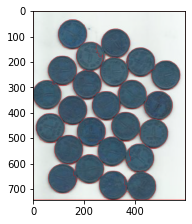

In [28]:
# Marker labelling
sure_fg = np.uint8(sure_fg)
ret, markers = cv2.connectedComponents(sure_fg)

markers = markers+1
markers[unknown==255] = 0

markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]

plt.subplot(121),plt.imshow(markers)
plt.subplot(121),plt.imshow(img)




# 1.4.16 Interactive Foreground Extraction using GrabCut Algorithm